# Importación y exploración del dataset

In [124]:
import pandas as pd
import pandas as pd
import numpy as np  # Agrega esta línea para importar NumPy

#Aqui extraemos el dataset (df_sucio) 

df_sucio = pd.read_csv('listings.csv')


#aqui realizo la limpieza del dataset guardandolo en df

df= df_sucio.drop(columns=["description","last_scraped","host_since","bathrooms","minimum_maximum_nights","maximum_maximum_nights","number_of_reviews_l30d","host_response_time","name","instant_bookable","review_scores_cleanliness","review_scores_checkin","review_scores_communication","host_is_superhost","host_has_profile_pic","neighbourhood","review_scores_accuracy","picture_url","minimum_nights_avg_ntm","maximum_nights_avg_ntm", "host_id","host_about","host_thumbnail_url","host_neighbourhood","calculated_host_listings_count_entire_homes","host_listings_count","availability_365","availability_90","availability_60","availability_30","has_availability","calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","source", "host_picture_url","host_url", "host_verifications","neighbourhood_group_cleansed","calendar_updated","license","neighborhood_overview", "id", "listing_url", "scrape_id","review_scores_location","review_scores_value", "host_about","host_location","host_name"])




df['bathrooms_text'] = df['bathrooms_text'].str.replace(' bath', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace(' baths', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace('shared baths', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace('private bath', '', regex=True)
df['bathrooms_text'] = df['bathrooms_text'].str.replace('[^\d.]', '', regex=True)
df['bathrooms_text'].replace('', np.nan, inplace=True)

df['bathrooms_text'] = df['bathrooms_text'].astype(float)


df['price'] = df['price'].str.replace('[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'])

df['host_response_rate'] = df['host_response_rate'].str.replace('[%,]', '', regex=True)
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('[%,]', '', regex=True)
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])





# Ejemplo de DataFrame
data = [
    ["Shared pool", "Hot water", "Shared sauna"],
    ["Air conditioning", "Washer", "Dedicated workspace", "Security cameras on property", "Gym"],
    ["Shared pool", "Hot water"],
    ["Gym"],
    []
]



def calcular_puntaje_porcentaje(amenities):
    # Lista de los valores que deben estar presentes para cada nivel de puntaje
    valores_nivel_5 = ["Free street parking", "Elevator", "Essentials", "Hot water", "Air conditioning", "Kitchen", "Microwave", "Long term stays allowed", "Hair dryer", "Coffee maker", "Wifi", "Cooking basics", "Heating", "TV", "Hangers", "Smoke alarm", "Dishes and silverware", "Oven", "Refrigerator", "Shampoo"]
    
    # Contar cuántos valores de nivel 5 están presentes en amenities
    count_nivel_5 = sum(1 for val in valores_nivel_5 if val in amenities)
    
    # Calcular el porcentaje de valores de nivel 5 en amenities
    porcentaje = (count_nivel_5 / len(valores_nivel_5)) * 100
    
    # Asignar el puntaje según el porcentaje
    if porcentaje >= 85:
        return 5
    elif porcentaje >= 75:
        return 4
    elif porcentaje >= 65:
        return 3
    elif porcentaje >= 20:
        return 2
    elif porcentaje == 0:
        return 0
    else:
        return 1


# Aplicar la función para crear la nueva columna "puntaje_amenities"
df['⭐Amenities_Score'] = df['amenities'].apply(calcular_puntaje_porcentaje)


df = df.drop("amenities", axis=1)
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 'f': 0})



top_10_maximos = df.nlargest(50, 'price')
filas_1_al_6 = top_10_maximos.iloc[1:4]
filas_7_al_11 = top_10_maximos.iloc[4:10]

df.loc[filas_1_al_6.index, '⭐Amenities_Score'] = 5

df.loc[filas_7_al_11.index, '⭐Amenities_Score'] = 4

import pandas as pd

# Supongamos que tienes un DataFrame llamado df con la columna 'neighbourhood_cleansed'
# y deseas crear la nueva columna 'neighbourhood_zone'

# Definimos una función para asignar la zona en función de los criterios
def asignar_zona(row):
    zonas_noreste = ['Palermo', 'Recoleta', 'Nuñez', 'Belgrano', 'Coghlan', 'Colegiales', 'Retiro', 'Villa Crespo', 'Chacarita']
    zonas_sureste = ['Boca','Barracas', 'Puerto Madero', 'Almagro', 'Balvanera', 'San Nicolas', 'Monserrat', 'San Telmo', 'Constitucion', 'Boedo', 'Caballito', 'Parque Chacabuco', 'San Cristobal']
    zonas_noroeste = ['Saavedra', 'Villa Pueyrredon', 'Villa Urquiza', 'Villa Ortuzar', 'Villa Devoto', 'Villa Del Parque', 'Agronomia', 'Parque Chas', 'Paternal', 'Flores', 'Monte Castro']
    zonas_suroeste = ['Velez Sarsfield', 'Mataderos', 'Parque Avellaneda', 'Villa Real', 'Versalles', 'Nueva Pompeya', 'Villa Riachuelo', 'Villa Soldati', 'Villa Santa Rita', 'Villa Gral. Mitre']
    
    if row['neighbourhood_cleansed'] in zonas_noreste:
        return 'Noreste'
    elif row['neighbourhood_cleansed'] in zonas_sureste:
        return 'Sureste'
    elif row['neighbourhood_cleansed'] in zonas_noroeste:
        return 'Noroeste'
    elif row['neighbourhood_cleansed'] in zonas_suroeste:
        return 'Suroeste'
    else:
        return 'Otro'  # Puedes asignar un valor 'Otro' para los casos que no coinciden con los criterios

# Aplicamos la función a cada fila del DataFrame y creamos la nueva columna 'neighbourhood_zone'
df['neighbourhood_zone'] = df.apply(asignar_zona, axis=1)

# Imprimimos el DataFrame con la nueva columna
df.iloc[16]


#con la funcion head mostramos los primeros 10 datos del dataset
df.head(10)


,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone
0,100.0,79.0,2,1,Palermo,-34.58184,-58.42415,Entire condo,Entire home/apt,2,...,2023-06-29,36,8,2012-07-02,2023-05-13,4.81,1,0.27,5,Noreste
1,100.0,100.0,11,1,Palermo,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,...,2023-06-28,108,11,2012-07-10,2023-04-20,4.78,6,0.81,4,Noreste
2,100.0,89.0,15,1,Palermo,-34.57819,-58.42964,Entire rental unit,Entire home/apt,9,...,2023-06-29,43,1,2011-11-23,2023-04-09,4.71,11,0.30,2,Noreste
3,100.0,99.0,30,1,Palermo,-34.58144,-58.42311,Entire condo,Entire home/apt,2,...,2023-06-29,90,21,2012-02-22,2023-05-21,4.92,24,0.65,5,Noreste
4,NaN,0.0,2,1,Recoleta,-34.58509,-58.40465,Entire rental unit,Entire home/apt,4,...,2023-06-28,2,0,2020-01-09,2020-03-31,5.00,2,0.05,5,Noreste
5,NaN,NaN,2,0,Nuñez,-34.53892,-58.46599,Private room in rental unit,Private room,1,...,2023-06-29,0,0,NaN,NaN,NaN,1,NaN,2,Noreste
6,100.0,100.0,19,1,Palermo,-34.57874,-58.43970,Entire loft,Entire home/apt,2,...,2023-06-29,65,0,2011-10-18,2020-01-29,4.92,16,0.46,5,Noreste
7,0.0,100.0,11,1,Monserrat,-34.61439,-58.37611,Entire loft,Entire home/apt,4,...,2023-06-28,46,0,2011-03-04,2019-11-30,4.28,9,0.31,3,Sureste
8,100.0,100.0,2,1,Recoleta,-34.59643,-58.39188,Entire rental unit,Entire home/apt,3,...,2023-06-29,26,0,2012-01-31,2022-03-22,4.52,2,0.19,5,Noreste
9,100.0,81.0,5,1,Balvanera,-34.60299,-58.40194,Private room in rental unit,Private room,1,...,2023-06-28,16,6,2011-11-11,2023-02-19,4.80,4,0.11,2,Sureste


*Estructura del dataset*


# El dataset incluye las siguientes columnas relevantes:

**last_scraped:** La fecha en la que los datos fueron extraídos por última vez del sitio web.

**host_response_rate:** La tasa de respuesta del anfitrión, que indica qué tan rápido responde un anfitrión a las consultas de los huéspedes.

**host_acceptance_rate:** La tasa de aceptación del anfitrión, que muestra la proporción de solicitudes de reserva que un anfitrión ha aceptado.

**host_identity_verified:** Indica si la identidad del anfitrión ha sido verificada por la plataforma.

***neighbourhood_cleansed:** El nombre del barrio o vecindario en el que se encuentra la propiedad, después de haber sido limpiado.

**property_type:** El tipo de propiedad, como apartamento, casa, cabaña, etc.

**room_type:** El tipo de habitación o alojamiento que se ofrece, como habitación privada, casa/apartamento completo, habitación compartida, etc.

**accommodates:** El número máximo de personas que la propiedad puede alojar.

**bathrooms_text:** El número de baños que posee la propiedad.

**bedrooms:** El número de dormitorios en la propiedad.

**beds:** El número total de camas disponibles en la propiedad.

**price:** El precio de alquiler por noche de la propiedad.

**calendar_last_scraped:** La fecha en la que se raspó por última vez el calendario de disponibilidad de la propiedad.

**number_of_reviews:** El número total de reseñas que ha recibido la propiedad.

**number_of_reviews_ltm:** El número de reseñas que la propiedad ha recibido en el último mes.

**first_review:** La fecha de la primera reseña realizada por un huésped.

**last_review:** La fecha de la última reseña realizada por un huésped.

**review_scores_rating:** La puntuación promedio de todas las reseñas de la propiedad, en una escala de 0 a 5.

**reviews_per_month:** El promedio de reseñas que la propiedad recibe cada mes.

**Amenities_Score:** Una métrica o puntuación (en una escala de 1 a 5) relacionada con las comodidades o servicios que ofrece la propiedad, calculada en función de las comodidades enumeradas en el anuncio y teniendo en cuenta aquellas que son mas importantes para los huespedes.

**describe() 
proporciona estadísticas como 
la cantidad de valores (count), 
la media (mean), la desviación estándar (std),
el valor mínimo (min), 
los cuartiles 25%, 50% (mediana) y 75%, 
y el valor máximo (max) para cada columna del DataFrame. 
Esto te ayuda a comprender la distribución de los datos y a identificar valores atípicos.**


In [46]:
#Aqui visualizamos la cantidad de filas y columnas del dataset

filas=df.shape[0]
columnas=df.shape[1]
print("Filas del dataset:  " + str(filas))
print("Columnas del dataset:  " + str(columnas))


Filas del dataset:  26204
Columnas del dataset:  28


In [47]:
df.describe()


,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score
count,22233.000000,23334.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26157.000000,20659.000000,25958.000000,...,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,21260.000000,26204.000000,21260.000000,26204.000000
mean,95.385733,86.048770,27.689399,0.948786,-34.590773,-58.418323,2.875248,1.258956,1.362554,1.916904,...,6.300145,517.633415,5.924286,6.462067,21.823386,9.561327,4.750452,16.062815,1.395734,3.325256
std,16.809513,24.992058,87.616200,0.220437,0.018311,0.030168,1.480234,0.654697,0.825942,1.577520,...,24.286468,765.951597,22.289832,22.644608,38.715892,13.972815,0.475450,33.051039,1.384079,1.225436
min,0.000000,0.000000,1.000000,0.000000,-34.693700,-58.530890,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
25%,100.000000,84.000000,1.000000,1.000000,-34.601158,-58.438060,2.000000,1.000000,1.000000,1.000000,...,2.000000,90.000000,2.000000,2.000000,1.000000,0.000000,4.690000,1.000000,0.380000,2.000000
50%,100.000000,98.000000,4.000000,1.000000,-34.590055,-58.420240,2.000000,1.000000,1.000000,1.000000,...,3.000000,365.000000,3.000000,3.000000,7.000000,4.000000,4.870000,2.000000,1.000000,3.000000
75%,100.000000,100.000000,18.000000,1.000000,-34.580430,-58.393920,4.000000,1.500000,2.000000,2.000000,...,4.000000,1125.000000,4.000000,5.000000,25.000000,14.000000,5.000000,11.000000,2.000000,4.000000
max,100.000000,100.000000,3334.000000,1.000000,-34.534980,-58.355410,16.000000,25.000000,35.000000,70.000000,...,1000.000000,99999.000000,1000.000000,1000.000000,657.000000,377.000000,5.000000,188.000000,20.470000,5.000000


*La función type() es una función incorporada en Python que se utiliza para determinar el tipo de un objeto o valor. Puedes usar esta función para averiguar si una variable es un número entero, una cadena de texto, una lista, un diccionario, una función u otro tipo de objeto en Python.*

In [37]:
df.dtypes

host_response_rate                float64
host_acceptance_rate              float64
host_total_listings_count           int64
host_identity_verified              int64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                    float64
bedrooms                          float64
beds                              float64
price                             float64
minimum_nights                      int64
maximum_nights                      int64
minimum_minimum_nights              int64
maximum_minimum_nights              int64
calendar_last_scraped              object
number_of_reviews                   int64
number_of_reviews_ltm               int64
first_review                       object
last_review                        object
review_scores_rating              

# Analisis de valores nulos en las columnas

In [125]:


df.fillna(0, inplace=True)
nulos = df.isnull()
nulos
numero_nulos = nulos.sum()  # Esto te dará el número de valores nulos
print(numero_nulos)


host_response_rate                0
host_acceptance_rate              0
host_total_listings_count         0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
calendar_last_scraped             0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                      0
last_review                       0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
⭐Amenities_Score                  0
neighbourhood_zone          

# Mapas de calor realizados a algunas de las columnas para analizar

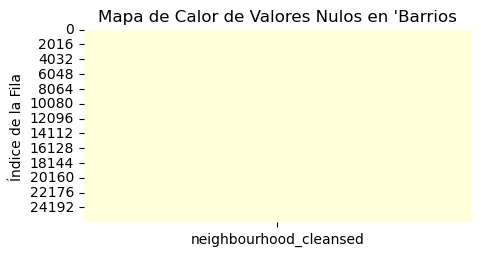

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['neighbourhood_cleansed'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Barrios")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()


C:\Users\fcapo\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.draw()
C:\Users\fcapo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


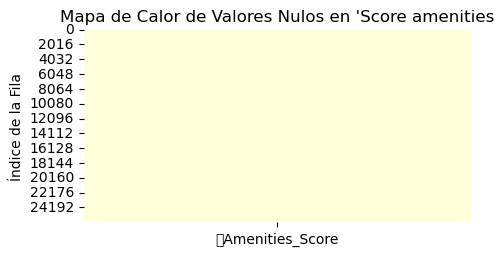

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['⭐Amenities_Score'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Score amenities")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

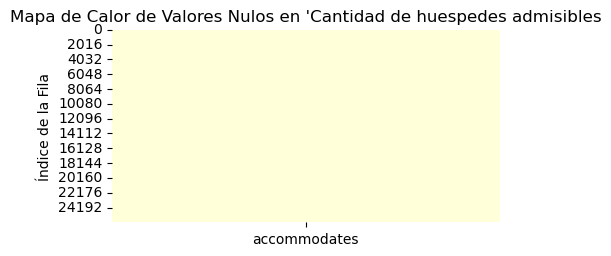

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['accommodates'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Cantidad de huespedes admisibles")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

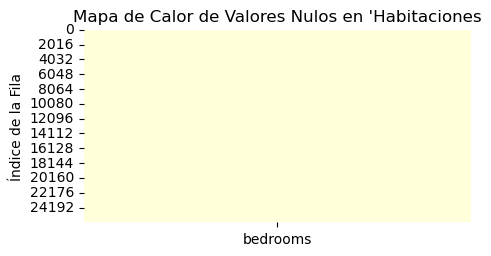

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['bedrooms'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Habitaciones")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

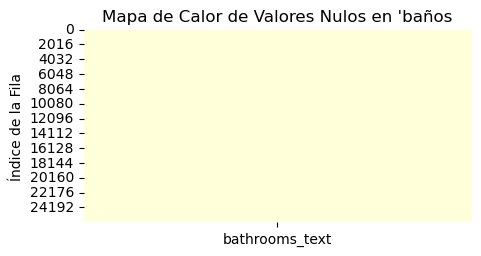

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['bathrooms_text'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'baños")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()

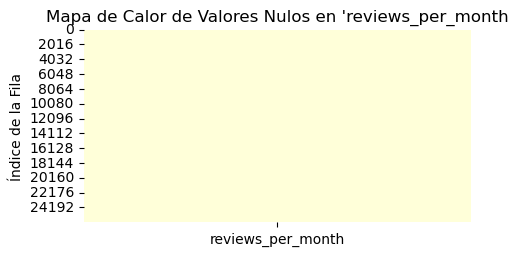

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['reviews_per_month'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'reviews_per_month")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()




In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


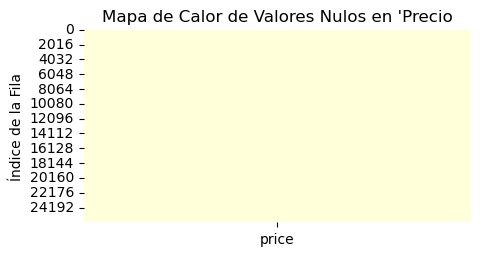

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#cant alta de nulos deberia considerar eliminar la columna

valores_nulos = df['price'].isnull()

valores_nulos_numericos = valores_nulos.astype(int)

# Crea un mapa de calor para visualizar los valores nulos
plt.figure(figsize=(5, 2.5))
sns.heatmap(valores_nulos_numericos.to_frame(), cmap="YlGnBu", cbar=False)
plt.title(f"Mapa de Calor de Valores Nulos en 'Precio")
plt.xlabel('')
plt.ylabel("Índice de la Fila")
plt.show()




# Matriz de correlacion
#### Cuando hablamos de coeficientes de correlacion conocemos entre *+1* y *-1* representa la interaccion y direccion de la relacion entre dos variables. La idea es que aquellas caracteristicas con alta correlacion con la variable dependiente son predictores fuertes cuando se usan en un modelo

In [29]:
df.fillna(0, inplace=True)
nulos = df.isnull()
nulos
numero_nulos = nulos.sum()  # Esto te dará el número de valores nulos
print(numero_nulos)


host_response_rate                0
host_acceptance_rate              0
host_total_listings_count         0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
calendar_last_scraped             0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                      0
last_review                       0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
⭐Amenities_Score                  0
neighbourhood_zone          

In [39]:
# Selecciona solo las columnas numéricas
df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando el método 'kendall'
corr = df_numeric.corr(method='kendall')

# Crea una visualización de la matriz de correlación usando Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()


NameError: name 'df_numeric' is not defined

C:\Users\fcapo\AppData\Local\Temp\ipykernel_36436\2919526904.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


host_response_rate               -0.031616
host_acceptance_rate             -0.026599
host_total_listings_count         0.033613
host_identity_verified           -0.032885
latitude                          0.005681
longitude                        -0.000893
accommodates                      0.039326
bathrooms_text                    0.037506
bedrooms                          0.037177
beds                              0.028179
price                             1.000000
minimum_nights                    0.009498
maximum_nights                    0.004619
minimum_minimum_nights            0.008120
maximum_minimum_nights            0.008479
number_of_reviews                -0.011743
number_of_reviews_ltm            -0.019078
review_scores_rating             -0.022242
calculated_host_listings_count   -0.002582
reviews_per_month                -0.023042
⭐Amenities_Score                  0.012032
Name: price, dtype: float64


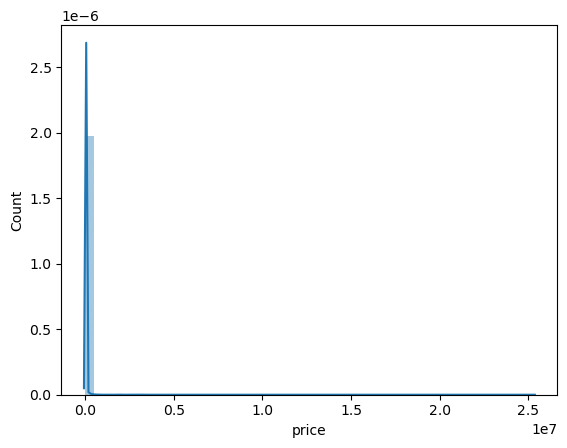

In [40]:
# Verifica si la columna 'price' contiene cadenas
if df['price'].dtype == 'object':
    # Aplica la operación de reemplazo solo si la columna es de tipo cadena
    df['price'] = df['price'].str.replace('[$,]', '', regex=True)

# Convierte la columna 'price' a tipo numérico
df['price'] = pd.to_numeric(df['price'])



sns.distplot(
    df['price'], norm_hist=False
).set(xlabel='price', ylabel='Count')
# Selecciona las columnas numéricas relevantes
numeric_columns = df.select_dtypes(include=['number'])

# Calcula la correlación de la columna 'price' con las otras columnas numéricas
correlation_with_price = numeric_columns.corr()['price']

# Imprime la correlación
print(correlation_with_price)


# Aqui visualizamos la distribucion de valores nulos por columnas

In [97]:
nulos = df.isnull()
nulos

numero_nulos = nulos.sum()  # Esto te dará el número de valores nulos
print(numero_nulos)


host_response_rate                0
host_acceptance_rate              0
host_total_listings_count         0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
calendar_last_scraped             0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                      0
last_review                       0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
⭐Amenities_Score                  0
neighbourhood_zone          

# Cantidad de publicaciones por barrio

In [49]:
print(df.columns)


Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'calculated_host_listings_count',
       'reviews_per_month', '⭐Amenities_Score', 'neighbourhood_zone'],
      dtype='object')


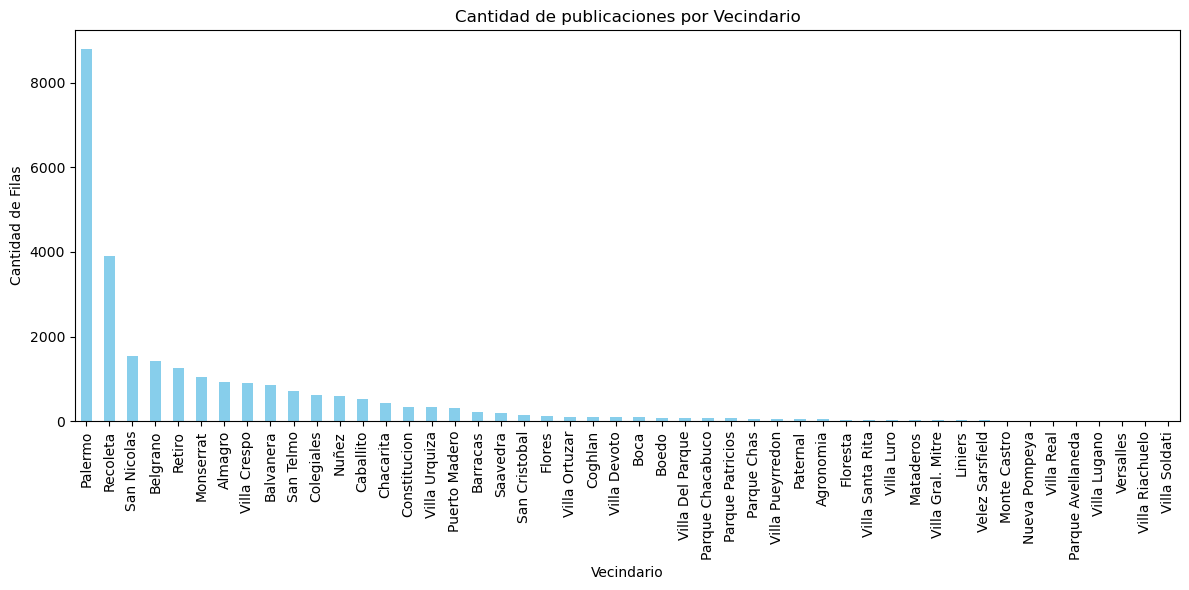

In [50]:

# Supongamos que tienes un DataFrame llamado df

# Obtén la cuenta de valores únicos en la columna "neighbourhood_cleansed"
conteo_neighbourhood = df['neighbourhood_cleansed'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias
conteo_neighbourhood.plot(kind='bar', color='skyblue')
plt.title("Cantidad de publicaciones por Vecindario")
plt.xlabel("Vecindario")
plt.ylabel("Cantidad de Filas")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para una mejor legibilidad
plt.tight_layout()
plt.show()


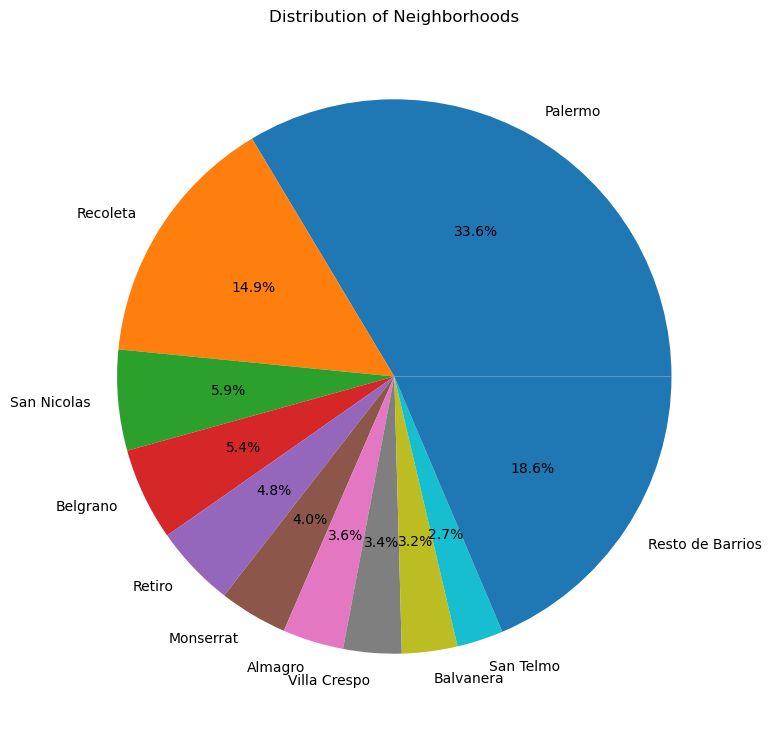

In [52]:

# Obtén la cuenta de valores únicos en la columna "neighbourhood_cleansed"
conteo_neighbourhood = df['neighbourhood_cleansed'].value_counts()

# Tomar los 10 barrios más representativos
top_10_barrios = conteo_neighbourhood.head(10)

# Agrupar el resto de barrios en "resto de barrios"
resto_barrios = pd.Series([conteo_neighbourhood[10:].sum()], index=['Resto de Barrios'])

# Combine the top 10 neighborhoods with "resto de barrios"
conteo_combinado = pd.concat([top_10_barrios, resto_barrios])

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(conteo_combinado, labels=conteo_combinado.index, autopct='%1.1f%%')
plt.title("Distribution of Neighborhoods")
plt.show()


     

## Numeros de cada barrio

In [53]:
print('Barrio:       Cantidad de publicaciones:')
conteo_neighbourhood = df['neighbourhood_cleansed'].value_counts()
conteo_neighbourhood

Barrio:       Cantidad de publicaciones:


neighbourhood_cleansed
Palermo              8800
Recoleta             3893
San Nicolas          1539
Belgrano             1417
Retiro               1250
Monserrat            1045
Almagro               933
Villa Crespo          890
Balvanera             847
San Telmo             709
Colegiales            623
Nuñez                 601
Caballito             513
Chacarita             431
Constitucion          335
Villa Urquiza         324
Puerto Madero         299
Barracas              205
Saavedra              188
San Cristobal         139
Flores                124
Villa Ortuzar         104
Coghlan                94
Villa Devoto           91
Boca                   88
Boedo                  85
Villa Del Parque       82
Parque Chacabuco       68
Parque Patricios       67
Parque Chas            61
Villa Pueyrredon       54
Paternal               41
Agronomia              40
Floresta               37
Villa Santa Rita       33
Villa Luro             25
Mataderos              21
Villa Gral. Mit

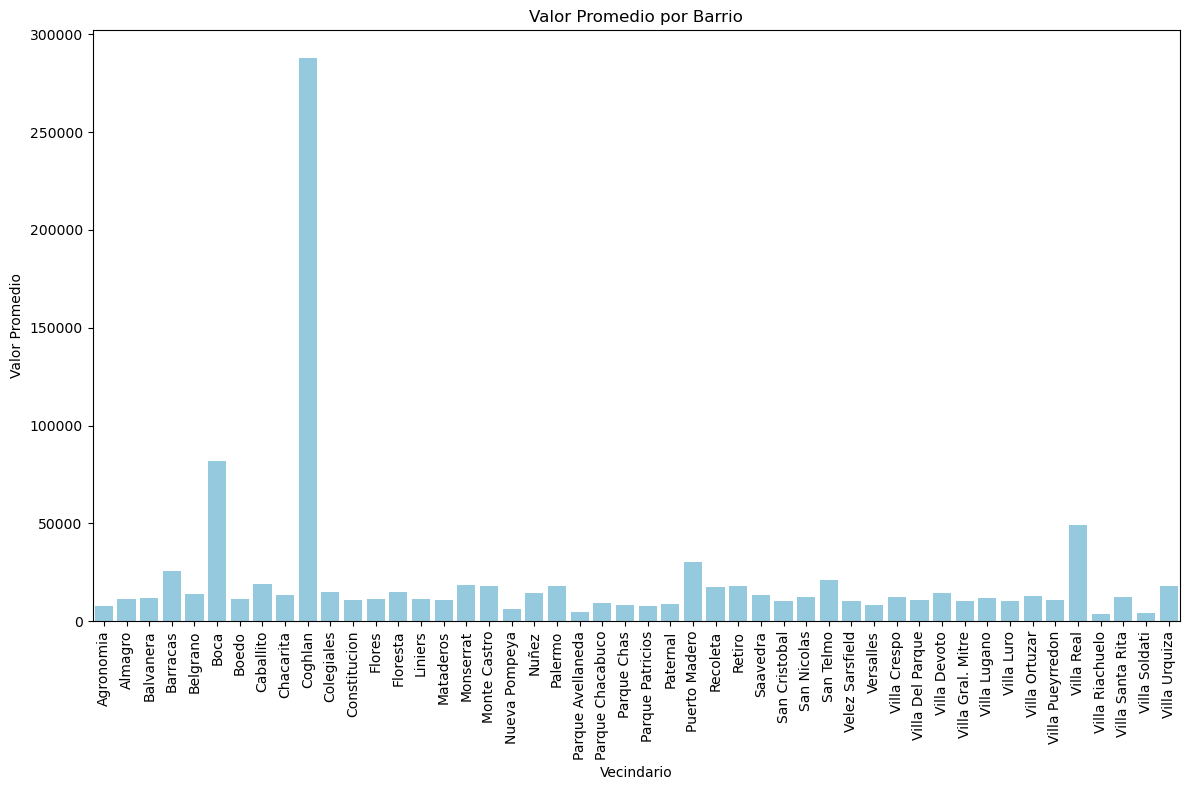

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importa Seaborn para una mejor visualización

# Calcula el valor promedio por neighbourhood_cleansed
valor_promedio_por_barrio = df.groupby('neighbourhood_cleansed')['price'].mean()

# Crea un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=valor_promedio_por_barrio.index, y=valor_promedio_por_barrio, color='skyblue')
plt.title("Valor Promedio por Barrio")
plt.xlabel("Vecindario")
plt.ylabel("Valor Promedio")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [55]:

precio_promedio_por_barrio = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
precio_promedio_por_barrio = precio_promedio_por_barrio.sort_values(by='price', ascending=False)
precio_promedio_por_barrio




,neighbourhood_cleansed,price
9,Coghlan,287660.755319
5,Boca,81981.068182
43,Villa Real,49321.888889
26,Puerto Madero,30228.752508
3,Barracas,25588.214634
32,San Telmo,21102.747532
7,Caballito,19153.684211
16,Monserrat,18349.882297
47,Villa Urquiza,18173.478395
20,Palermo,18003.435795


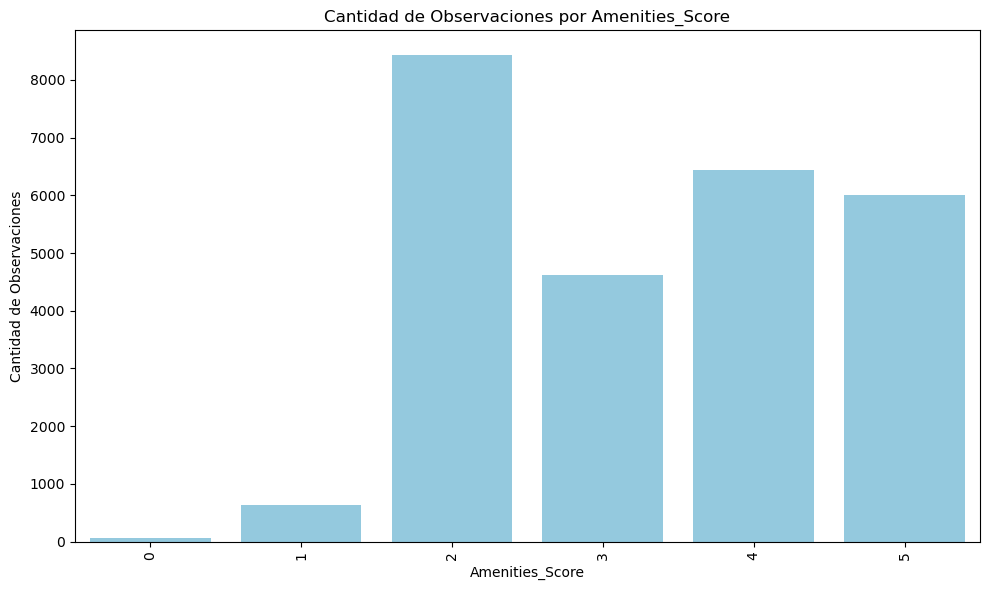

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado df que contiene la columna "Amenities_Score"
# A continuación, se graficará la cantidad de observaciones por cada valor único en "Amenities_Score".

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.countplot(data=df, x='⭐Amenities_Score', color='skyblue')
plt.title("Cantidad de Observaciones por Amenities_Score")
plt.xlabel("Amenities_Score")
plt.ylabel("Cantidad de Observaciones")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()


In [58]:
top_10_maximos = df.nlargest(10, 'price')
top_10_maximos

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone
8145,0.0,0.0,1,0,Coghlan,-34.560720,-58.467930,Entire rental unit,Entire home/apt,3,...,2023-06-29,8,0,2019-10-02,2020-02-11,5.00,1,0.18,5,Noreste
14401,0.0,100.0,3,1,Palermo,-34.578886,-58.432196,Entire loft,Entire home/apt,3,...,2023-06-29,0,0,0,0,0.00,1,0.00,5,Noreste
13132,0.0,83.0,1,0,San Telmo,-34.625140,-58.374660,Private room in townhouse,Private room,1,...,2023-06-29,3,3,2022-10-10,2023-02-23,5.00,1,0.34,5,Sureste
9020,100.0,95.0,1,1,Palermo,-34.588330,-58.439000,Entire rental unit,Entire home/apt,2,...,2023-06-29,23,13,2020-01-27,2023-06-14,4.83,1,0.55,5,Noreste
25302,78.0,0.0,2,1,Boca,-34.625620,-58.365420,Entire rental unit,Entire home/apt,3,...,2023-06-28,0,0,0,0,0.00,1,0.00,4,Sureste
24922,0.0,0.0,1,1,Monserrat,-34.612200,-58.371503,Shared room in rental unit,Shared room,1,...,2023-06-28,0,0,0,0,0.00,1,0.00,4,Sureste
7982,75.0,50.0,1,1,Retiro,-34.592620,-58.379530,Entire serviced apartment,Entire home/apt,3,...,2023-06-29,19,0,2019-09-25,2021-10-11,4.53,1,0.41,4,Noreste
7414,100.0,0.0,1,1,Palermo,-34.581340,-58.424470,Entire rental unit,Entire home/apt,7,...,2023-06-29,34,0,2019-07-19,2020-12-07,4.52,1,0.71,4,Noreste
7563,100.0,100.0,2,1,Caballito,-34.626250,-58.436350,Entire rental unit,Entire home/apt,1,...,2023-06-28,0,0,0,0,0.00,1,0.00,4,Sureste
7914,0.0,0.0,1,1,Palermo,-34.595390,-58.424320,Entire rental unit,Entire home/apt,3,...,2023-06-28,0,0,0,0,0.00,1,0.00,4,Noreste


In [59]:
precio_promedio_por_categoria = df.groupby('⭐Amenities_Score')['price'].mean().reset_index()
precio_promedio_por_categoria

,⭐Amenities_Score,price
0,0,89276.069444
1,1,12508.818750
2,2,15706.518791
3,3,14523.642037
4,4,16460.088025
5,5,23212.832335


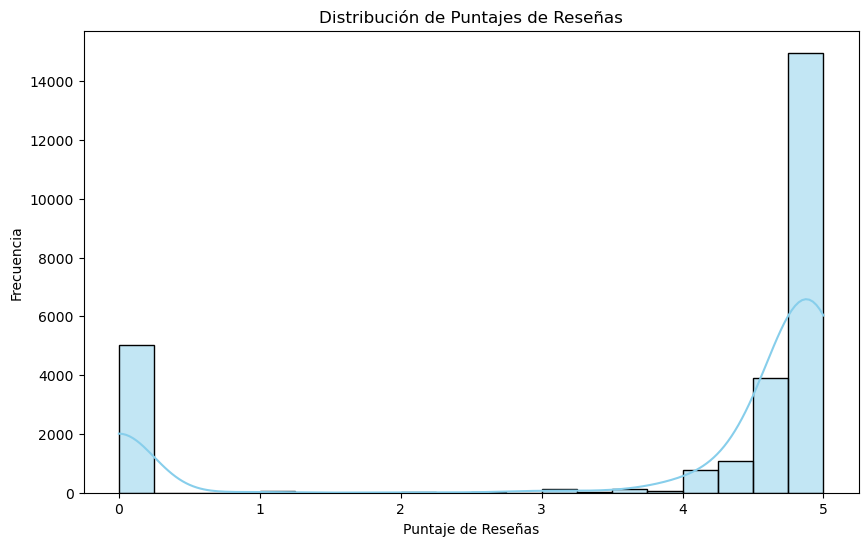

In [60]:


# Supongamos que tienes un DataFrame llamado df con la columna 'review_scores_rating'

# Visualización de la distribución de puntajes de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df['review_scores_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Puntajes de Reseñas')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Frecuencia')
plt.show()



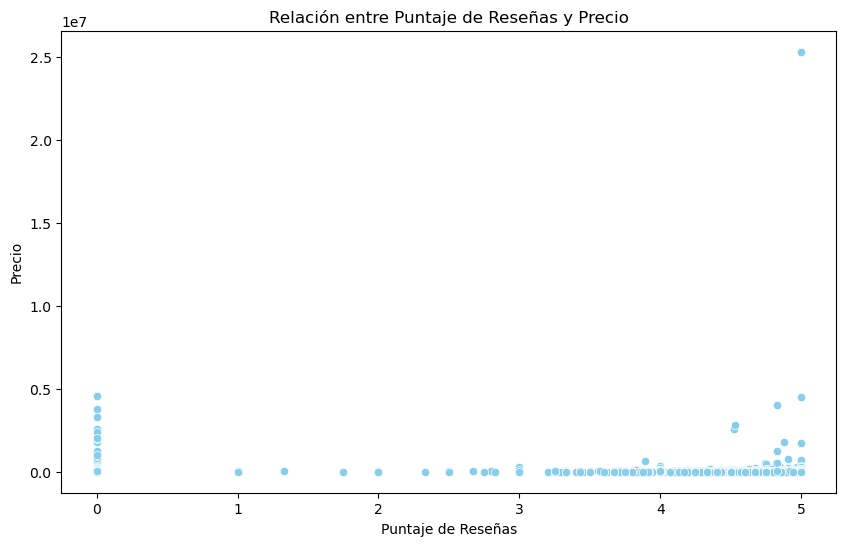

In [61]:
# Visualización de la relación entre puntaje de reseñas y precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_scores_rating', y='price', color='skyblue')
plt.title('Relación entre Puntaje de Reseñas y Precio')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Precio')
plt.show()



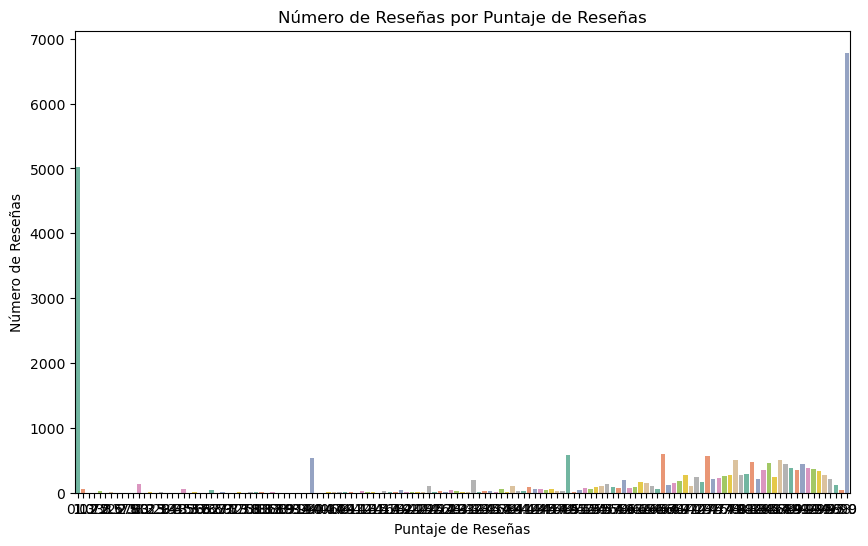

In [62]:
# Visualización del número de reseñas por puntaje de reseñas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='review_scores_rating', palette='Set2')
plt.title('Número de Reseñas por Puntaje de Reseñas')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Número de Reseñas')
plt.show()


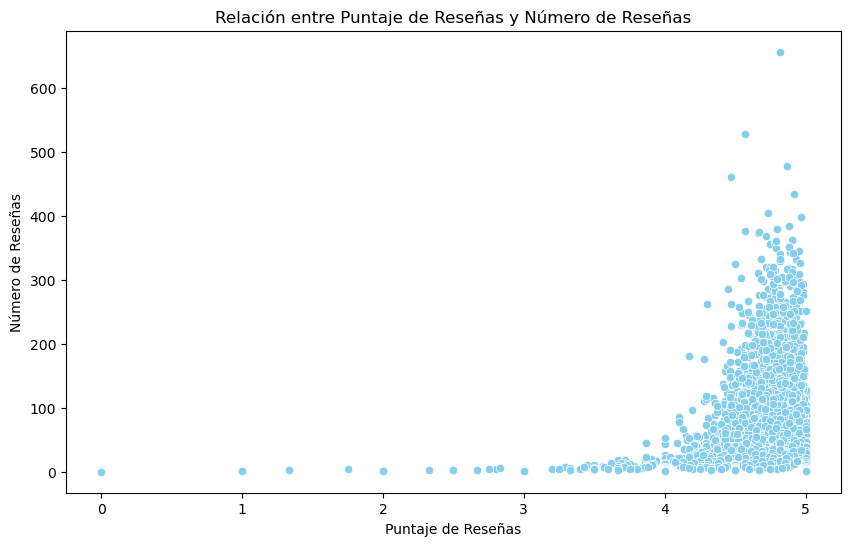

In [63]:
# Visualización de la relación entre puntaje de reseñas y número de reseñas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_scores_rating', y='number_of_reviews', color='skyblue')
plt.title('Relación entre Puntaje de Reseñas y Número de Reseñas')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Número de Reseñas')
plt.show()



array([[<Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'host_acceptance_rate'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'host_identity_verified'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms_text'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'minimum_minimum_nights'}>,
        <Axes: title={'center': 'maximum_minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'calcu

C:\Users\fcapo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  func(*args, **kwargs)
C:\Users\fcapo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


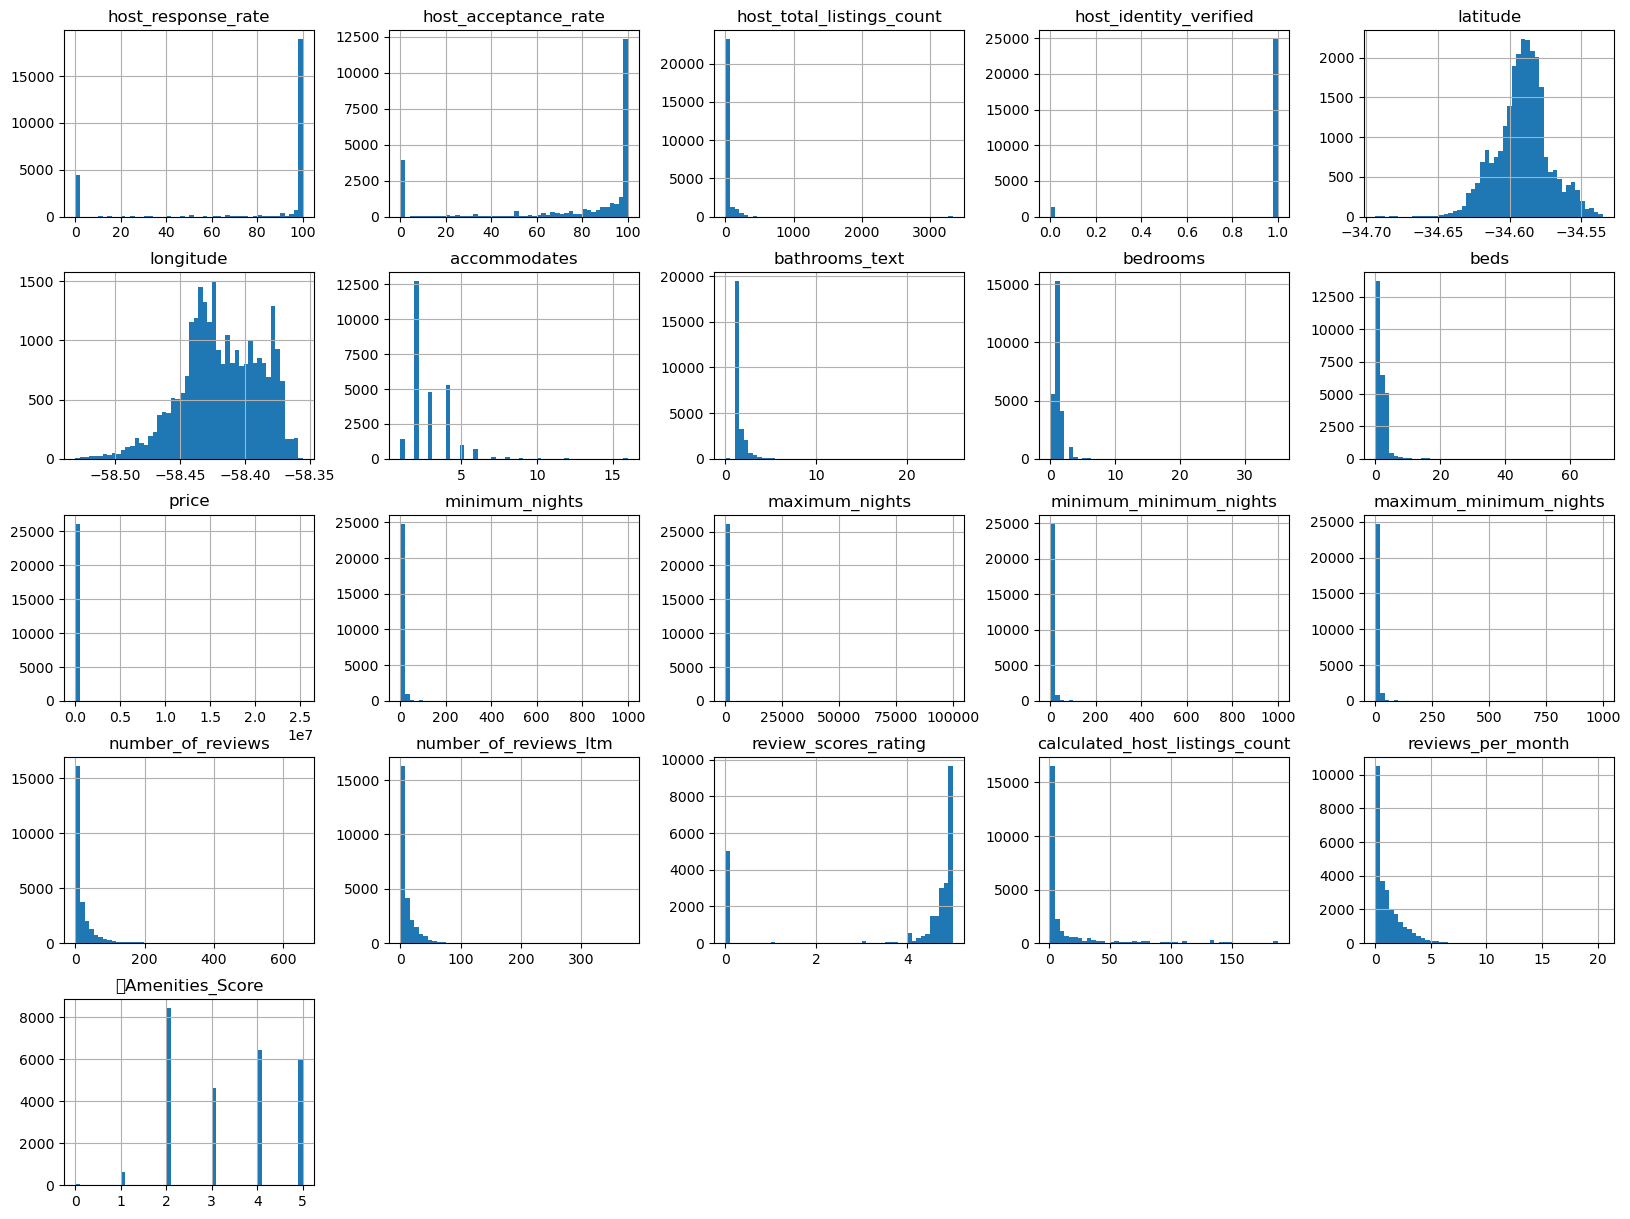

In [64]:
df.hist(bins=50, figsize=(20,15))

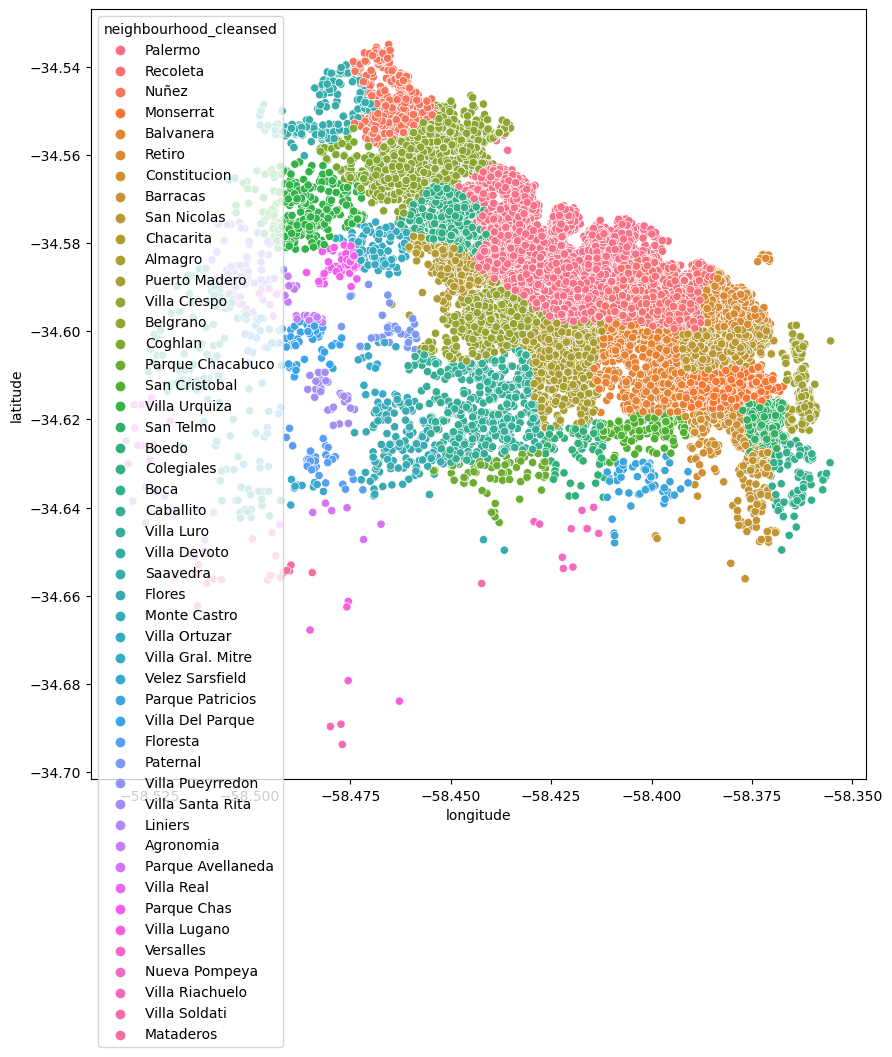

In [65]:
#Let us create a scatter plot with the longitude and the latitude data


import matplotlib.pyplot as plt
import seaborn as sns

plt_dims = (10, 10)
plt.figure(figsize=plt_dims)

sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_cleansed)

plt.show()


<Axes: xlabel='longitude', ylabel='latitude'>

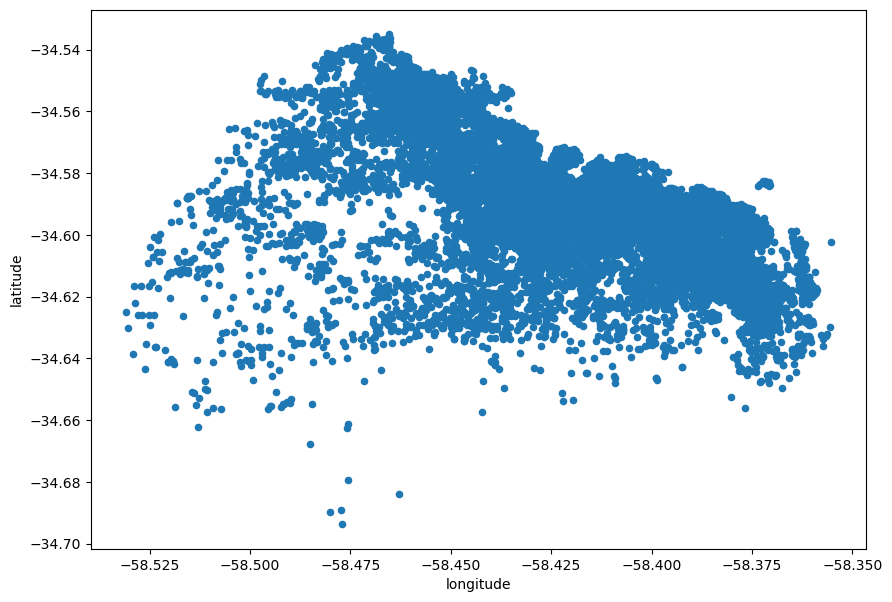

In [66]:
df.plot(kind="scatter", x='longitude', y='latitude', figsize=(10,7))

In [225]:
import folium
from folium.plugins import HeatMap

# Supongamos que tu DataFrame se llama 'df' y contiene las columnas 'longitude' y 'latitude'
# Asegúrate de que 'df' tenga las coordenadas en las columnas 'longitude' y 'latitude'.

# Crea un mapa
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Convierte las coordenadas en una lista de puntos
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Crea el mapa térmico
HeatMap(heat_data).add_to(m)

# Guarda el mapa en un archivo HTML
m.save('heatmap.html')
display(m)


In [69]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


# Entega 3
## Clasificacion, agrupamiento e interpretacion de resultados

In [126]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

df_new = df[[ 'latitude','neighbourhood_zone',
       'longitude', 'room_type', 'price','review_scores_rating'
       ,'number_of_reviews', 'accommodates','bathrooms_text','bedrooms','beds', 'calculated_host_listings_count','host_total_listings_count']]
df_new.head()

,latitude,neighbourhood_zone,longitude,room_type,price,review_scores_rating,number_of_reviews,accommodates,bathrooms_text,bedrooms,beds,calculated_host_listings_count,host_total_listings_count
0,-34.58184,Noreste,-58.42415,Entire home/apt,17339.0,4.81,36,2,1.0,1.0,1.0,1,2
1,-34.58617,Noreste,-58.41036,Entire home/apt,7807.0,4.78,108,2,1.0,1.0,1.0,6,11
2,-34.57819,Noreste,-58.42964,Entire home/apt,61868.0,4.71,43,9,1.0,3.0,4.0,11,15
3,-34.58144,Noreste,-58.42311,Entire home/apt,15330.0,4.92,90,2,1.0,1.0,1.0,24,30
4,-34.58509,Noreste,-58.40465,Entire home/apt,20381.0,5.00,2,4,1.0,2.0,3.0,2,2


In [127]:
# Subset all categorical variables
df_categorical = df_new.select_dtypes(include=['object'])
df_categorical.head()

,neighbourhood_zone,room_type
0,Noreste,Entire home/apt
1,Noreste,Entire home/apt
2,Noreste,Entire home/apt
3,Noreste,Entire home/apt
4,Noreste,Entire home/apt


# Codificacion 

In [128]:
#convert to dummies

df_dummies = pd.get_dummies(df_new['room_type'], drop_first = True)
df_dummies = df_dummies.astype(int)

df_dummies.head(80)

,Hotel room,Private room,Shared room
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
75,0,0,0
76,0,0,0
77,0,0,0
78,0,1,0


In [129]:
df_new = df_new.drop(list(df_categorical.columns),axis = 1)
df_new


,latitude,longitude,price,review_scores_rating,number_of_reviews,accommodates,bathrooms_text,bedrooms,beds,calculated_host_listings_count,host_total_listings_count
0,-34.581840,-58.424150,17339.0,4.81,36,2,1.0,1.0,1.0,1,2
1,-34.586170,-58.410360,7807.0,4.78,108,2,1.0,1.0,1.0,6,11
2,-34.578190,-58.429640,61868.0,4.71,43,9,1.0,3.0,4.0,11,15
3,-34.581440,-58.423110,15330.0,4.92,90,2,1.0,1.0,1.0,24,30
4,-34.585090,-58.404650,20381.0,5.00,2,4,1.0,2.0,3.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
26199,-34.577472,-58.439153,17374.0,0.00,0,3,1.0,0.0,1.0,76,87
26200,-34.618287,-58.442370,4280.0,0.00,0,4,1.0,1.0,4.0,1,4
26201,-34.606622,-58.391399,9900.0,0.00,0,3,1.0,0.0,2.0,32,34
26202,-34.594989,-58.374312,30571.0,0.00,0,7,3.5,4.0,5.0,1,4


In [130]:
# Concatenate dummy variables with X
df_new = pd.concat([df, df_dummies], axis=1)
df_new

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone,Hotel room,Private room,Shared room
0,100.0,79.0,2,1,Palermo,-34.581840,-58.424150,Entire condo,Entire home/apt,2,...,2012-07-02,2023-05-13,4.81,1,0.27,5,Noreste,0,0,0
1,100.0,100.0,11,1,Palermo,-34.586170,-58.410360,Entire rental unit,Entire home/apt,2,...,2012-07-10,2023-04-20,4.78,6,0.81,4,Noreste,0,0,0
2,100.0,89.0,15,1,Palermo,-34.578190,-58.429640,Entire rental unit,Entire home/apt,9,...,2011-11-23,2023-04-09,4.71,11,0.30,2,Noreste,0,0,0
3,100.0,99.0,30,1,Palermo,-34.581440,-58.423110,Entire condo,Entire home/apt,2,...,2012-02-22,2023-05-21,4.92,24,0.65,5,Noreste,0,0,0
4,0.0,0.0,2,1,Recoleta,-34.585090,-58.404650,Entire rental unit,Entire home/apt,4,...,2020-01-09,2020-03-31,5.00,2,0.05,5,Noreste,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,100.0,83.0,87,1,Palermo,-34.577472,-58.439153,Entire rental unit,Entire home/apt,3,...,0,0,0.00,76,0.00,5,Noreste,0,0,0
26200,100.0,78.0,4,1,Caballito,-34.618287,-58.442370,Entire rental unit,Entire home/apt,4,...,0,0,0.00,1,0.00,2,Sureste,0,0,0
26201,100.0,100.0,34,1,San Nicolas,-34.606622,-58.391399,Entire rental unit,Entire home/apt,3,...,0,0,0.00,32,0.00,4,Sureste,0,0,0
26202,100.0,100.0,4,1,Retiro,-34.594989,-58.374312,Entire rental unit,Entire home/apt,7,...,0,0,0.00,1,0.00,5,Noreste,0,0,0


In [131]:
df_new.dtypes


host_response_rate                float64
host_acceptance_rate              float64
host_total_listings_count           int64
host_identity_verified              int64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                    float64
bedrooms                          float64
beds                              float64
price                             float64
minimum_nights                      int64
maximum_nights                      int64
minimum_minimum_nights              int64
maximum_minimum_nights              int64
calendar_last_scraped              object
number_of_reviews                   int64
number_of_reviews_ltm               int64
first_review                       object
last_review                        object
review_scores_rating              

In [132]:
# Subset all numerical variables
df_numerical = df_new.select_dtypes(include=['float64', 'int64'])
df_numerical.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score
0,100.0,79.0,2,1,-34.58184,-58.42415,2,1.0,1.0,1.0,...,3,1125,3,3,36,8,4.81,1,0.27,5
1,100.0,100.0,11,1,-34.58617,-58.41036,2,1.0,1.0,1.0,...,7,365,7,7,108,11,4.78,6,0.81,4
2,100.0,89.0,15,1,-34.57819,-58.42964,9,1.0,3.0,4.0,...,1,365,1,2,43,1,4.71,11,0.30,2
3,100.0,99.0,30,1,-34.58144,-58.42311,2,1.0,1.0,1.0,...,3,180,3,3,90,21,4.92,24,0.65,5
4,0.0,0.0,2,1,-34.58509,-58.40465,4,1.0,2.0,3.0,...,20,180,20,20,2,0,5.00,2,0.05,5


In [133]:
df_numerical.describe()



,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score
count,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,...,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000,26204.000000
mean,80.930812,76.624256,27.689399,0.948786,-34.590773,-58.418323,2.875248,1.256697,1.074225,1.898909,...,6.300145,517.633415,5.924286,6.462067,21.823386,9.561327,3.854168,16.062815,1.132396,3.325256
std,37.545061,35.754223,87.616200,0.220437,0.018311,0.030168,1.480234,0.656276,0.920631,1.580942,...,24.286468,765.951597,22.289832,22.644608,38.715892,13.972815,1.907345,33.051039,1.361043,1.225436
min,0.000000,0.000000,1.000000,0.000000,-34.693700,-58.530890,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,96.000000,71.000000,1.000000,1.000000,-34.601158,-58.438060,2.000000,1.000000,1.000000,1.000000,...,2.000000,90.000000,2.000000,2.000000,1.000000,0.000000,4.330000,1.000000,0.100000,2.000000
50%,100.000000,96.000000,4.000000,1.000000,-34.590055,-58.420240,2.000000,1.000000,1.000000,1.000000,...,3.000000,365.000000,3.000000,3.000000,7.000000,4.000000,4.800000,2.000000,0.670000,3.000000
75%,100.000000,100.000000,18.000000,1.000000,-34.580430,-58.393920,4.000000,1.500000,1.000000,2.000000,...,4.000000,1125.000000,4.000000,5.000000,25.000000,14.000000,5.000000,11.000000,1.710000,4.000000
max,100.000000,100.000000,3334.000000,1.000000,-34.534980,-58.355410,16.000000,25.000000,35.000000,70.000000,...,1000.000000,99999.000000,1000.000000,1000.000000,657.000000,377.000000,5.000000,188.000000,20.470000,5.000000


In [134]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_new['neighbourhood_zone'] = labelencoder.fit_transform(df_new['neighbourhood_zone'])
df_new['neighbourhood_cleansed'] = labelencoder.fit_transform(df_new['neighbourhood_cleansed'])
df_new['property_type'] = labelencoder.fit_transform(df_new['property_type'])

In [135]:
df_new['price'] = np.where(df_new['price'] < 0, 1, df_new['price'])


In [136]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
# Encuentra el valor mínimo en la columna 'price'
min_price = df_new['price'].min()

# Suma 1 más el valor absoluto del mínimo a todos los valores en la columna 'price'
df_new['price'] = df_new['price'] - min_price + 1

# Aplica la transformación Yeo-Johnson
df_new['price'], price_lambda = boxcox(df_new['price'])

print('Valor de lambda para Yeo-Johnson:', price_lambda)


values = df_new['number_of_reviews'].values
data1 = pd.DataFrame({'x':values})
pt.fit(data1)
print(pt.lambdas_)
df_new['number_of_reviews']= boxcox1p(df_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))



values = df_new['calculated_host_listings_count'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)
df_new['calculated_host_listings_count']= boxcox1p(df_new['calculated_host_listings_count'],pt.lambdas_)
print('"calculated_host_listings_count lambda: {}"'.format(pt.lambdas_))





values = df_new['review_scores_rating'].values
data3 = pd.DataFrame({'x':values})
pt.fit(data3)
print(pt.lambdas_)
df_new['review_scores_rating']= boxcox1p(df_new['review_scores_rating'],pt.lambdas_)
print('"review_scores_rating lambda: {}"'.format(pt.lambdas_))



values = df_new['beds'].values
data4 = pd.DataFrame({'x':values})
pt.fit(data4)
print(pt.lambdas_)
df_new['beds']= boxcox1p(df_new['beds'],pt.lambdas_)
print('"beds lambda: {}"'.format(pt.lambdas_))



values = df_new['bedrooms'].values
data6 = pd.DataFrame({'x':values})
pt.fit(data6)
print(pt.lambdas_)
df_new['bedrooms']= boxcox1p(df_new['bedrooms'],pt.lambdas_)
print('"bedrooms lambda: {}"'.format(pt.lambdas_))





values = df_new['accommodates'].values
data5 = pd.DataFrame({'x':values})
pt.fit(data5)
print(pt.lambdas_)
df_new['accommodates']= boxcox1p(df_new['accommodates'],pt.lambdas_)
print('"accommodates lambda: {}"'.format(pt.lambdas_))



values = df_new['bathrooms_text'].values
data7 = pd.DataFrame({'x':values})
pt.fit(data7)
print(pt.lambdas_)
df_new['bathrooms_text']= boxcox1p(df_new['bathrooms_text'],pt.lambdas_)
print('"bathrooms_text lambda: {}"'.format(pt.lambdas_))


values = df_new['host_total_listings_count'].values
data23 = pd.DataFrame({'x':values})
pt.fit(data23)
print(pt.lambdas_)
df_new['host_total_listings_count']= boxcox1p(df_new['host_total_listings_count'],pt.lambdas_)
print('"host_total_listings_count lambda: {}"'.format(pt.lambdas_))

values = df_new['minimum_minimum_nights'].values
data238 = pd.DataFrame({'x':values})
pt.fit(data238)
print(pt.lambdas_)
df_new['minimum_minimum_nights']= boxcox1p(df_new['minimum_minimum_nights'],pt.lambdas_)
print('"minimum_minimum_nights lambda: {}"'.format(pt.lambdas_))

values = df_new['maximum_minimum_nights'].values
data239 = pd.DataFrame({'x':values})
pt.fit(data239)
print(pt.lambdas_)
df_new['maximum_minimum_nights']= boxcox1p(df_new['maximum_minimum_nights'],pt.lambdas_)
print('"maximum_minimum_nights lambda: {}"'.format(pt.lambdas_))


values = df_new['number_of_reviews'].values
data180 = pd.DataFrame({'x':values})
pt.fit(data180)
print(pt.lambdas_)
df_new['number_of_reviews']= boxcox1p(df_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))


values = df_new['reviews_per_month'].values
data1800 = pd.DataFrame({'x':values})
pt.fit(data1800)
print(pt.lambdas_)
df_new['reviews_per_month']= boxcox1p(df_new['reviews_per_month'],pt.lambdas_)
print('"reviews_per_month lambda: {}"'.format(pt.lambdas_))

values = df_new['⭐Amenities_Score'].values
data1800 = pd.DataFrame({'x':values})
pt.fit(data1800)
print(pt.lambdas_)
df_new['⭐Amenities_Score']= boxcox1p(df_new['⭐Amenities_Score'],pt.lambdas_)
print('"⭐Amenities_Score lambda: {}"'.format(pt.lambdas_))



Valor de lambda para Yeo-Johnson: -0.1288192497817571
[-0.04819294]
"number_of_reviews lambda: [-0.04819294]"
[-0.59505302]
"calculated_host_listings_count lambda: [-0.59505302]"
[2.58197628]
"review_scores_rating lambda: [2.58197628]"
[-0.77296651]
"beds lambda: [-0.77296651]"
[0.06873253]
"bedrooms lambda: [0.06873253]"
[-0.67979946]
"accommodates lambda: [-0.67979946]"
[-1.50713452]
"bathrooms_text lambda: [-1.50713452]"
[-0.43446588]
"host_total_listings_count lambda: [-0.43446588]"
[-0.80909579]
"minimum_minimum_nights lambda: [-0.80909579]"
[-0.74240438]
"maximum_minimum_nights lambda: [-0.74240438]"
[0.71938083]
"number_of_reviews lambda: [0.71938083]"
[-0.67183055]
"reviews_per_month lambda: [-0.67183055]"
[0.779765]
"⭐Amenities_Score lambda: [0.779765]"


In [137]:
df_new

,host_response_rate,host_acceptance_rate,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,first_review,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone,Hotel room,Private room,Shared room
0,100.0,79.0,0.873600,1,20,-34.581840,-58.424150,10,Entire home/apt,0.773958,...,2012-07-02,2023-05-13,36.015299,0.567983,0.220814,3.903310,0,0,0,0
1,100.0,100.0,1.519730,1,20,-34.586170,-58.410360,19,Entire home/apt,0.773958,...,2012-07-10,2023-04-20,35.531958,1.152605,0.489336,3.216071,0,0,0,0
2,100.0,89.0,1.611603,1,20,-34.578190,-58.429640,19,Entire home/apt,1.163540,...,2011-11-23,2023-04-09,34.419511,1.297456,0.240542,1.738061,0,0,0,0
3,100.0,99.0,1.783952,1,20,-34.581440,-58.423110,10,Entire home/apt,0.773958,...,2012-02-22,2023-05-21,37.821560,1.433011,0.425239,3.903310,0,0,0,0
4,0.0,0.0,0.873600,1,27,-34.585090,-58.404650,19,Entire home/apt,0.978461,...,2020-01-09,2020-03-31,39.169014,0.806481,0.047999,3.903310,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,100.0,83.0,1.972649,1,20,-34.577472,-58.439153,19,Entire home/apt,0.897779,...,0,0,0.000000,1.553792,0.000000,3.903310,0,0,0,0
26200,100.0,78.0,1.157836,1,7,-34.618287,-58.442370,19,Entire home/apt,0.978461,...,0,0,0.000000,0.567983,0.000000,1.738061,3,0,0,0
26201,100.0,100.0,1.810543,1,31,-34.606622,-58.391399,19,Entire home/apt,0.897779,...,0,0,0.000000,1.470702,0.000000,3.216071,3,0,0,0
26202,100.0,100.0,1.157836,1,28,-34.594989,-58.374312,19,Entire home/apt,1.113174,...,0,0,0.000000,0.567983,0.000000,3.903310,0,0,0,0


In [206]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

#columns_to_remove = ['number_of_reviews_ltm','host_response_rate', 'host_acceptance_rate', 'host_identity_verified',

 #     'room_type','calendar_last_scraped', 'reviews_per_month', '⭐Amenities_Score','first_review',
  #    'last_review' ]
#df_new.drop(columns=columns_to_remove, inplace=True)
df_train, df_test = train_test_split(df_new, train_size=0.7, test_size=0.3)


In [207]:
df_new.columns

Index(['host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count',
       'reviews_per_month', '⭐Amenities_Score', 'neighbourhood_zone',
       'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [208]:
# Let's take a look at the train dataframe now
df_train.head()

,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,price,...,maximum_minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone,Hotel room,Private room,Shared room
7193,0.59851,28,-34.588400,-58.381880,19,0.897779,0.430082,0.709924,0.740315,5.302059,...,1.059300,2.203909,38.155743,0.567983,0.289620,3.216071,0,0,0,0
19260,0.59851,27,-34.584464,-58.399548,19,0.773958,0.430082,0.709924,0.536617,5.272793,...,0.541831,2.017721,34.105600,0.567983,0.863621,1.738061,0,0,0,0
2029,1.51973,20,-34.575310,-58.434160,19,0.773958,0.430082,0.000000,0.536617,5.498424,...,1.241738,1.658097,39.169014,0.943999,0.075005,1.738061,0,0,0,0
4703,0.59851,20,-34.568960,-58.441800,19,0.773958,0.430082,0.709924,0.536617,5.461518,...,1.119871,2.573633,37.323624,0.567983,0.393818,3.903310,0,0,0,0
11178,0.87360,29,-34.555890,-58.481650,10,0.978461,0.536815,1.141155,0.850652,5.418735,...,0.939181,2.524765,38.660365,0.567983,0.692750,3.216071,1,0,0,0


In [209]:
# Split the train dataset into X and y
y_train = df_train.pop('price')
X_train = df_train
X_train 

,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,...,maximum_minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone,Hotel room,Private room,Shared room
7193,0.598510,28,-34.588400,-58.381880,19,0.897779,0.430082,0.709924,0.740315,7,...,1.059300,2.203909,38.155743,0.567983,0.289620,3.216071,0,0,0,0
19260,0.598510,27,-34.584464,-58.399548,19,0.773958,0.430082,0.709924,0.536617,1,...,0.541831,2.017721,34.105600,0.567983,0.863621,1.738061,0,0,0,0
2029,1.519730,20,-34.575310,-58.434160,19,0.773958,0.430082,0.000000,0.536617,30,...,1.241738,1.658097,39.169014,0.943999,0.075005,1.738061,0,0,0,0
4703,0.598510,20,-34.568960,-58.441800,19,0.773958,0.430082,0.709924,0.536617,10,...,1.119871,2.573633,37.323624,0.567983,0.393818,3.903310,0,0,0,0
11178,0.873600,29,-34.555890,-58.481650,10,0.978461,0.536815,1.141155,0.850652,4,...,0.939181,2.524765,38.660365,0.567983,0.692750,3.216071,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20396,0.598510,2,-34.598160,-58.408540,19,0.897779,0.430082,0.709924,0.850652,3,...,0.865706,1.804550,37.323624,0.567983,0.796929,3.903310,3,0,0,0
10398,2.105988,20,-34.589290,-58.427980,14,1.237616,0.594746,1.906761,1.141979,1,...,0.541831,2.775431,29.603813,1.606250,0.812791,3.903310,0,0,0,0
21728,1.244946,27,-34.594389,-58.393450,19,0.897779,0.496748,0.709924,0.740315,7,...,1.059300,0.000000,0.000000,1.101890,0.000000,1.738061,0,0,0,0
71,0.873600,27,-34.596430,-58.391880,19,0.897779,0.430082,0.709924,0.740315,3,...,0.865706,2.785683,35.371723,0.806481,0.283748,3.903310,0,0,0,0


In [210]:


# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [211]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.76984755e-02  5.62083451e-04  1.01373682e+00  8.69921878e-01
 -9.87851469e-04  4.71532214e-01  6.61491966e-01  7.39629604e-02
 -3.37577839e-02 -5.24183290e-06  2.15215980e-06 -9.70831164e-02
 -2.60601366e-02 -3.19565222e-03  3.11846926e-04 -1.03094288e-02
 -1.22018425e-01  1.67827574e-02 -1.56109590e-02 -9.19317825e-02
 -6.68489352e-02 -1.85205061e-01]
90.66876292571726


In [212]:
# Supongamos que tienes una Serie o una lista llamada 'price_values' con los valores de 'price' que deseas insertar
# Si no tienes 'price_values', puedes asignar un valor constante a 'price' para todas las filas, por ejemplo, 0.


df_test['price'] =df_new['price']  # O df_test['price'] = 0 si es un valor constante


y_test = df_test.pop('price')
X_test = df_test

X_test

,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,...,maximum_minimum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,⭐Amenities_Score,neighbourhood_zone,Hotel room,Private room,Shared room
5297,0.598510,20,-34.592570,-58.418480,19,0.773958,0.430082,0.709924,0.536617,4,...,0.939181,2.645862,39.169014,0.567983,0.531510,2.497647,0,0,0,0
13387,1.700769,20,-34.568120,-58.430470,10,0.897779,0.430082,0.709924,0.740315,3,...,0.865706,2.955193,36.665924,1.331030,1.051091,3.903310,0,0,0,0
22268,0.598510,20,-34.576794,-58.423519,19,0.978461,0.430082,0.709924,0.850652,1,...,0.541831,1.173109,33.793430,0.567983,0.642814,1.738061,0,0,0,0
8650,1.415626,28,-34.593050,-58.378070,19,0.773958,0.496748,0.000000,0.536617,10,...,1.119871,2.317140,35.371723,0.943999,0.359980,1.738061,0,0,0,0
25735,1.519730,1,-34.602884,-58.418030,19,0.773958,0.430082,0.709924,0.536617,2,...,0.751117,0.630327,39.169014,1.297456,0.554143,1.738061,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1.987680,20,-34.591687,-58.428627,14,1.035879,0.430082,0.709924,0.850652,4,...,0.939181,1.658097,39.169014,1.525699,0.584273,3.216071,0,0,0,0
11302,1.157836,20,-34.573890,-58.432110,19,0.773958,0.430082,0.000000,0.536617,5,...,0.990805,2.918078,38.660365,0.806481,0.932402,3.216071,0,0,0,0
1686,1.910233,20,-34.580210,-58.440400,19,0.773958,0.496748,0.709924,0.536617,7,...,1.059300,0.630327,0.000000,1.523999,0.009917,1.738061,0,0,0,0
22178,0.873600,41,-34.582110,-58.467572,19,0.978461,0.430082,0.709924,0.920846,1,...,0.541831,0.000000,0.000000,0.806481,0.000000,1.738061,1,0,0,0


In [213]:

predicts = lm.predict(X_test)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 0.1586896017261502
        R2 Score: 38.05898485952692
        Mean Absolute Error: 0.11110662201500138
     


In [214]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 0.1586896017261502
        R2 Score: 0.38058984859526923
        Mean Absolute Error: 0.11110662201500138
     


Text(0, 0.5, 'Actual')

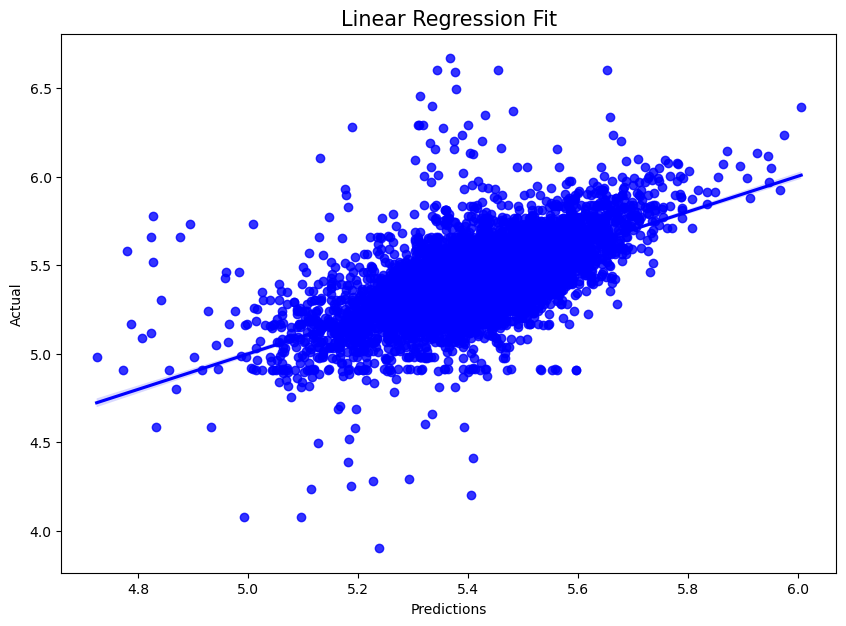

In [215]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y_test, x=predicts, color='blue')
plt.title('Linear Regression Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

Text(0.5, 1.0, 'Residuals')

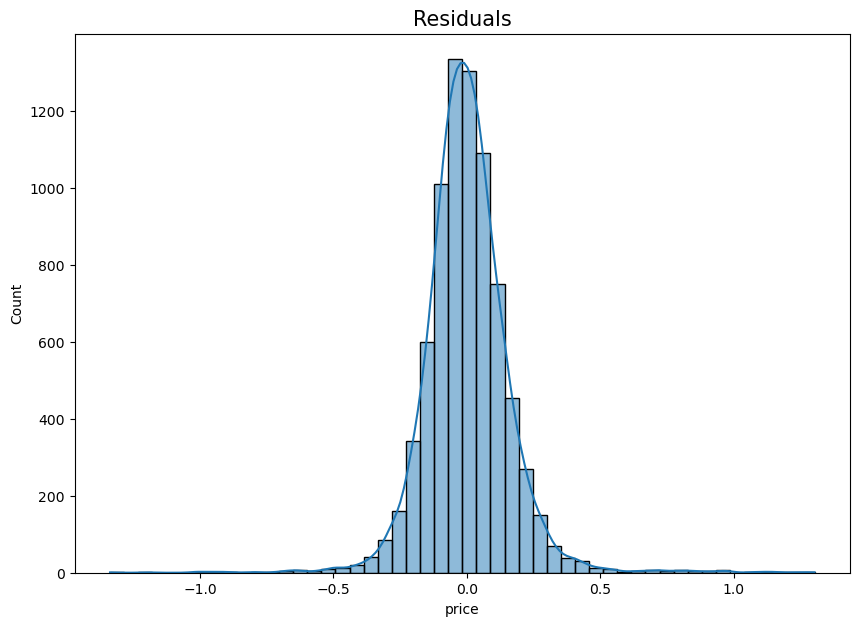

In [216]:
#Plot the residuals
plt.figure(figsize=(10,7))
sns.histplot((y_test-predicts),bins=50,kde=True)
plt.title('Residuals', fontsize=15)

### Los residuos son la diferencia entre las predicciones del modelo y los valores reales. Este gráfico ayuda a evaluar si los residuos siguen una distribución normal y si hay patrones sistemáticos en los errores del modelo. Puedes utilizar esta visualización para verificar la calidad de tu modelo de regresión y determinar si es necesario realizar ajustes o mejoras en el mismo

In [217]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score


# Entrenar el modelo de Random Forest
rfr_reg =  RandomForestRegressor(random_state=42)
rfr_reg.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
rfr_pred_test = rfr_reg.predict(X_test)

# Calcular el RMSE en los datos de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, rfr_pred_test))
print(f"RMSE en los datos de prueba: {rmse_test}")
# Calcular R² en los datos de prueba
r2_test = r2_score(y_test, rfr_pred_test)
print(f"Coeficiente de determinación (R²) en los datos de prueba: {r2_test}")


rfr_pred_train = rfr_reg.predict(X_train)

# Calcular R² en los datos de entrenamiento
r2_train = r2_score(y_train, rfr_pred_train)
print(f"Coeficiente de determinación (R²) en los datos de entrenamiento: {r2_train}")

RMSE en los datos de prueba: 0.1409805843451212
Coeficiente de determinación (R²) en los datos de prueba: 0.511122566259977
Coeficiente de determinación (R²) en los datos de entrenamiento: 0.9241367076369992


Text(0, 0.5, 'Actual')

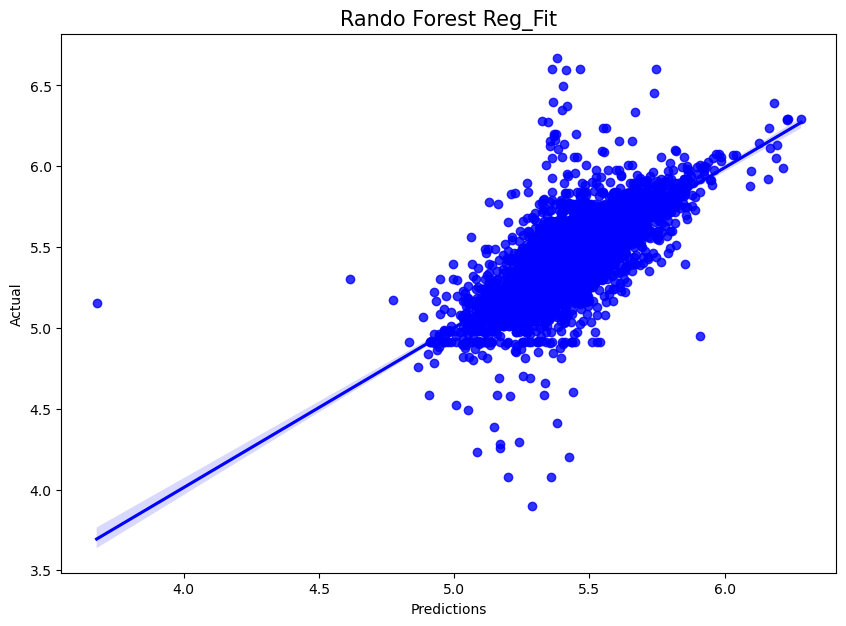

In [218]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y_test, x=rfr_pred_test, color='blue')
plt.title('Rando Forest Reg_Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

Text(0.5, 1.0, 'Residuals')

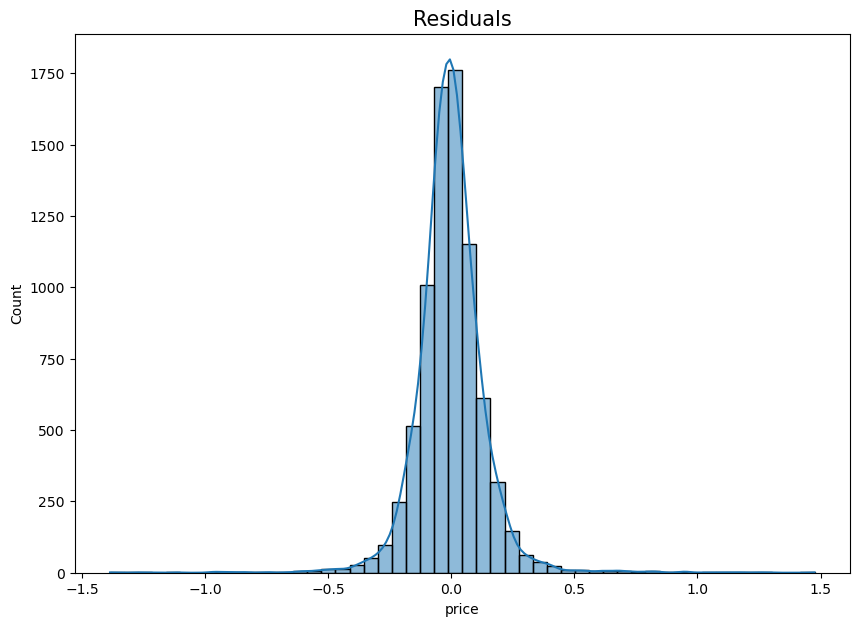

In [219]:
#Plot the residuals
plt.figure(figsize=(10,7))
sns.histplot((y_test-rfr_pred_test),bins=50,kde=True)
plt.title('Residuals', fontsize=15)

In [220]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (18342, 22)
Dimensions of the training target vector: (18342,)
Dimensions of the test feature matrix: (7862, 22)
Dimensions of the test target vector: (7862,)


In [221]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear un modelo XGBoost para regresión
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar el modelo en los datos de entrenamiento
xgb_reg.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
xgb_pred_test = xgb_reg.predict(X_test)

# Calcular el RMSE en los datos de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))

# Calcular el R² en los datos de prueba
r2_test = r2_score(y_test, xgb_pred_test)

# Realizar predicciones en los datos de entrenamiento
xgb_pred_train = xgb_reg.predict(X_train)
# Calcular el R² en los datos de entrenamiento
r2_train = r2_score(y_train, xgb_pred_train)


print(f"RMSE en los datos de prueba (XGBoost): {rmse_test}")
print(f"Coeficiente de determinación (R²) en los datos de prueba (XGBoost): {r2_test}")
print(f"Coeficiente de determinación (R²) en los datos de entrenamiento (XGBoost): {r2_train}")


RMSE en los datos de prueba (XGBoost): 0.14156940294767362
Coeficiente de determinación (R²) en los datos de prueba (XGBoost): 0.507030353618454
Coeficiente de determinación (R²) en los datos de entrenamiento (XGBoost): 0.7626993630023169


Text(0, 0.5, 'Actual')

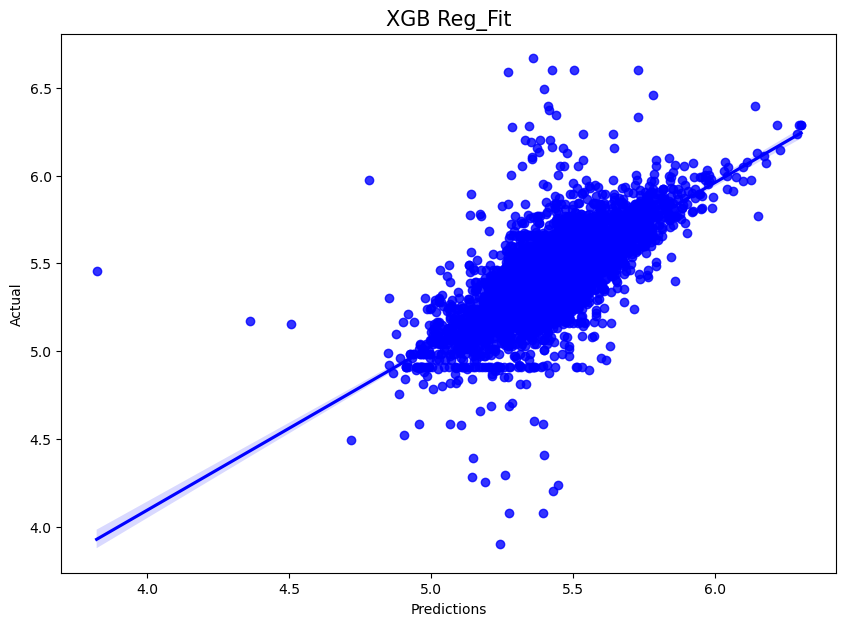

In [222]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y_test, x=xgb_pred_test, color='blue')
plt.title('XGB Reg_Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

Text(0.5, 1.0, 'Residuals')

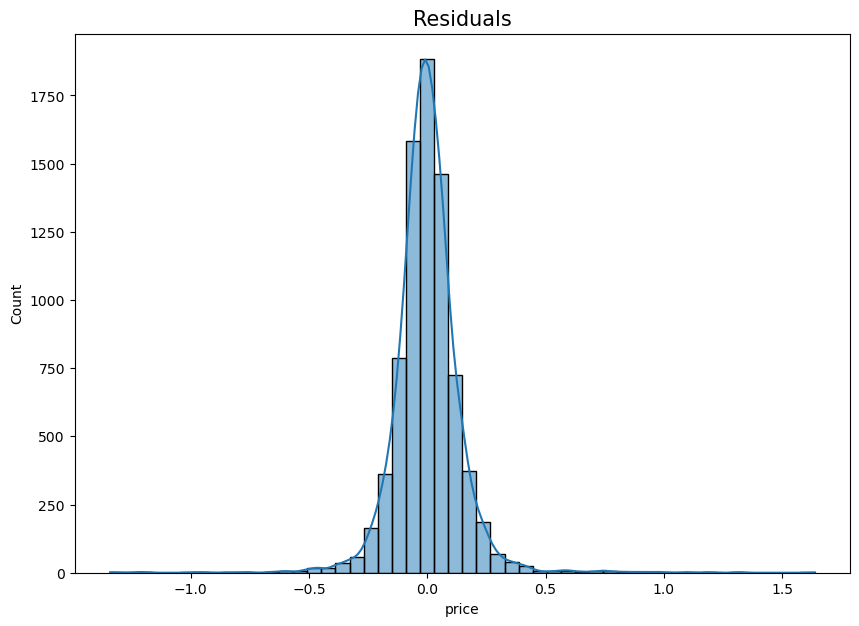

In [223]:
#Plot the residuals
plt.figure(figsize=(10,7))
sns.histplot((y_test-xgb_pred_test),bins=50,kde=True)
plt.title('Residuals', fontsize=15)

C:\Users\fcapo\AppData\Local\Temp\ipykernel_36436\3391876879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


host_total_listings_count         0.087345
neighbourhood_cleansed            0.069787
latitude                          0.137661
longitude                         0.032312
property_type                    -0.267863
accommodates                      0.484316
bathrooms_text                    0.296186
bedrooms                          0.427834
beds                              0.303148
price                             1.000000
minimum_nights                   -0.012600
maximum_nights                    0.024049
minimum_minimum_nights           -0.021697
maximum_minimum_nights           -0.005767
number_of_reviews                -0.057640
review_scores_rating             -0.058996
calculated_host_listings_count    0.071469
reviews_per_month                -0.088324
⭐Amenities_Score                  0.122643
neighbourhood_zone               -0.169751
Hotel room                       -0.027246
Private room                     -0.271532
Shared room                      -0.133996
Name: price

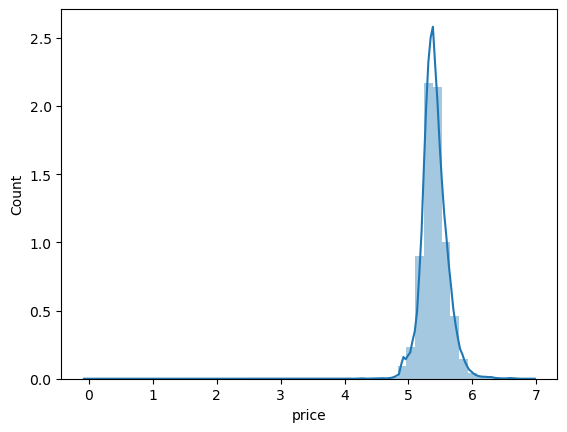

In [224]:

sns.distplot(
    df_new['price'], norm_hist=False
).set(xlabel='price', ylabel='Count')
# Selecciona las columnas numéricas relevantes
numeric_columns = df_new.select_dtypes(include=['number'])

# Calcula la correlación de la columna 'price' con las otras columnas numéricas
correlation_with_price = numeric_columns.corr()['price']

# Imprime la correlación
print(correlation_with_price)

# Conclusiones

#### -Del modelo de Regresión Lineal, el 36% de las variaciones en el precio (y) se explica mediante las variables independientes. Sin embargo, Random Forest y Gradient Boosting obtuvieron un valor R-cuadrado de aproximadamente un poco arriba de el 50%
#### -El rendimiento del modelo se basa principalmente en las bajas correlaciones entre las variables independientes y la variable objetivo.

#### -A partir del gráfico de residuos, podemos ver que la diferencia entre los valores y reales y los valores y predichos se distribuye de forma normal.

## Clusterizacion

## K-means en funcion de price y neighbourhood zone

C:\Users\fcapo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


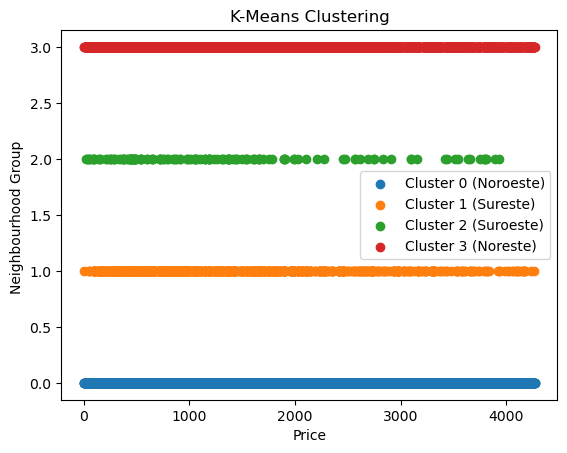

In [226]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_new['neighbourhood_zone'] = labelencoder.fit_transform(df_new['neighbourhood_zone'])
df_new['price'] = labelencoder.fit_transform(df_new['price'])



# Selecciona las columnas 'price' y 'neighbourhood_group_cleansed'
X = df_new[['price', 'neighbourhood_zone']]

# Escala las características para que tengan media 0 y desviación estándar 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 4  # Puedes ajustar este valor según tus necesidades

# Aplica el algoritmo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

neighborhood_mapping = {
    0: 'Noroeste',
    1: 'Sureste',
    2: 'Suroeste',
    3: 'Noreste',
 
}

# Luego, en el bucle de trazado, usa el diccionario para obtener la etiqueta del vecindario
for cluster in range(n_clusters):
    neighborhood_label = neighborhood_mapping[cluster]
    plt.scatter(
        df_new[df_new['neighbourhood_zone'] == cluster]['price'],
        df_new[df_new['neighbourhood_zone'] == cluster]['neighbourhood_zone'],
        label=f'Cluster {cluster} ({neighborhood_label})',
    )

plt.xlabel('Price')
plt.ylabel('Neighbourhood Group ')
plt.title('K-Means Clustering')
plt.legend()
plt.show()



C:\Users\fcapo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


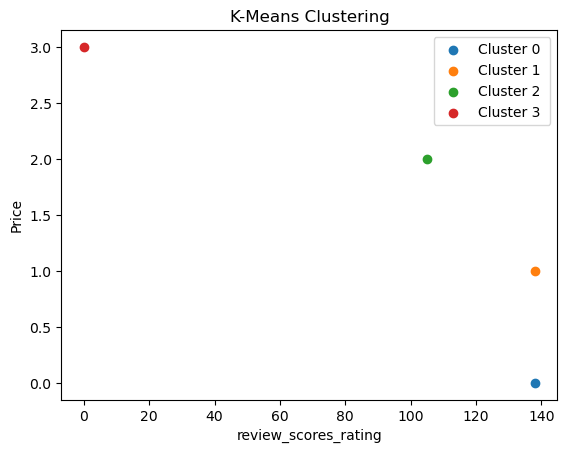

In [227]:
labelencoder = LabelEncoder()
df_new['review_scores_rating'] = labelencoder.fit_transform(df_new['review_scores_rating'])



# Selecciona las columnas 'price' y 'neighbourhood_group_cleansed'
X = df_new[['price', 'review_scores_rating']]

# Escala las características para que tengan media 0 y desviación estándar 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 4  # Puedes ajustar este valor según tus necesidades

# Aplica el algoritmo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)



# Luego, en el bucle de trazado, usa el diccionario para obtener la etiqueta del vecindario
# Luego, en el bucle de trazado, usa el diccionario para obtener la etiqueta del vecindario
for cluster in range(n_clusters):
    plt.scatter(
        df_new[df_new['price'] == cluster]['review_scores_rating'],
        df_new[df_new['price'] == cluster]['price'],
        label=f'Cluster {cluster} ',
    )

plt.xlabel('review_scores_rating')
plt.ylabel('Price')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
